## Install dependencies

In [ ]:
!pip install tweepy
!pip install pymongo
!pip install vaderSentiment
!pip install emoji

## Import some needed scripts

In [8]:
from dataset import getFeaturesFromDBData, getDataFromTweeterInDB, Database
from pprint import pprint
import importlib
import ml
importlib.reload(ml)

<module 'ml' from 'c:\\Users\\kalyv\\Documents\\Projects\\ΑΠΘ\\Data & Web Sience\\Web Data Mining\\Project 3\\Twitter Bot Detection\\ml.py'>

## Define some constants needed

In [2]:
MONGO_DB_URI = "mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass&directConnection=true&ssl=false"
USER_DATASET_FILE = "users_dataset.csv"

## Gather data using twitter API and populate MongoDB

We gather the data in a way to try to maintain a 50-50% of bots and humans

In [ ]:
getDataFromTweeterInDB(MONGO_DB_URI,USER_DATASET_FILE)

## Create our features dataset using the data we have in the database

In [3]:
dataset = getFeaturesFromDBData(MONGO_DB_URI)
dataset.fillna(value=0)
dataset.to_csv("dataset.csv")
dataset["label"] = dataset["label"].map({"HUMAN": 0, "BOT": 1}) #Map BOT label to 1 and Human label to 0
pprint(dataset.head())

User 21630333 (BOT) has no tweets in the database
User 22036045 (HUMAN) has no tweets in the database
User 22730529 (HUMAN) has no tweets in the database
User 23220415 (BOT) has no tweets in the database
User 23223395 (HUMAN) has no tweets in the database
User 23222867 (BOT) has no tweets in the database
User 23224336 (BOT) has no tweets in the database
User 23258087 (BOT) has no tweets in the database
User 23258968 (BOT) has no tweets in the database
User 25070587 (HUMAN) has no tweets in the database
User 23272942 (BOT) has no tweets in the database
User 24221453 (BOT) has no tweets in the database
User 31626280 (HUMAN) has no tweets in the database
User 25008627 (BOT) has no tweets in the database
User 25292754 (BOT) has no tweets in the database
User 33114252 (BOT) has no tweets in the database
User 37193429 (BOT) has no tweets in the database
User 37967468 (BOT) has no tweets in the database
User 43624887 (BOT) has no tweets in the database
User 49548467 (BOT) has no tweets in the

## Train models and get metrics

In [4]:
results = ml.trainModels(dataset)
for result in results:
    print('Model : ' + result['name'])
    pprint(result['metrics'])
    print('-----')

Model : RF
{'accuracy': 0.8516666666666668,
 'f1_weighted': 0.8517247299475186,
 'precision_weighted': 0.8529177220220834,
 'recall_weighted': 0.8516666666666668,
 'roc_auc': 0.9191249579262333}
-----
Model : KNN
{'accuracy': 0.8049999999999999,
 'f1_weighted': 0.8046177229789627,
 'precision_weighted': 0.8071447321679383,
 'recall_weighted': 0.8049999999999999,
 'roc_auc': 0.8715343695892882}
-----
Model : SVM
{'accuracy': 0.8195833333333333,
 'f1_weighted': 0.8196499651259428,
 'precision_weighted': 0.8203267558594763,
 'recall_weighted': 0.8195833333333333,
 'roc_auc': 0.8895317414180044}
-----
Model : GNB
{'accuracy': 0.7541666666666667,
 'f1_weighted': 0.7319347270467994,
 'precision_weighted': 0.7838751854854772,
 'recall_weighted': 0.7541666666666667,
 'roc_auc': 0.8550675780996222}
-----


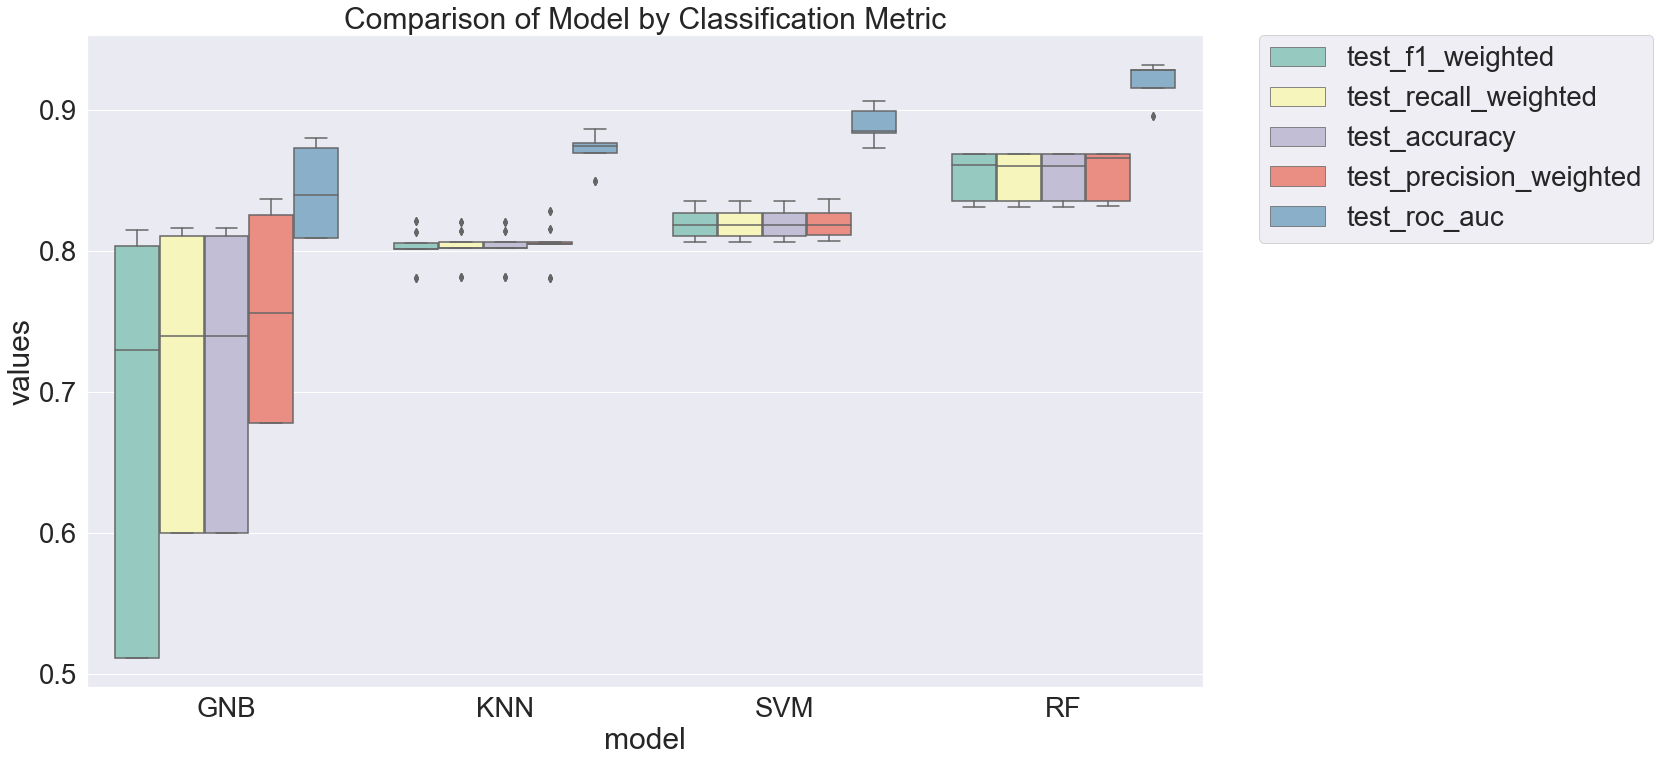

In [9]:
ml.modelComparison(results)